In [33]:
import os
import json
import pandas as pd
import numpy as np 
from scipy.stats.stats import pearsonr
from sklearn.metrics import normalized_mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
run_dir = '../OutputArchive/'

In [24]:
main_folders =  list(os.walk(run_dir))[0][1]
main_folders = [os.path.join(run_dir, folder) for folder in main_folders]
main_folders = [main_folders[4]]

In [23]:
main_folders

'../OutputArchive/GoodToGo'

In [25]:
 cols = ['iter_num', 'Selected Band','Action Type','Mean','Min','Max','Metric Current State','Metric Next State','Reward','Loss']
d = pd.DataFrame(columns=cols)



for folder in main_folders:
    runs = list(os.walk(folder))[0][1]
    for run in runs:
        run_path = os.path.join(folder, run)
        
        f = open(os.path.join(run_path, 'config.json'))
        config = json.load(f)
        
        run_df = pd.read_csv(os.path.join(run_path, 'Results.csv'))
        run_df['agent_class'] = config['agent']['agent_class']
        run_df['reward_type'] = config['agent']['reward_type']
        run_df['band_selection_num'] = config['data']['band_selection_num']
        run_df['dataset_type'] = config['data']['dataset_type']
        run_df['double_q'] = config['critic']['double_q']
        
        d = d.append(run_df)
        
        
    

In [29]:
d.loc[(d['agent_class']=='DQN') & (d['double_q']==True), 'agent_class'] = 'DDQN'

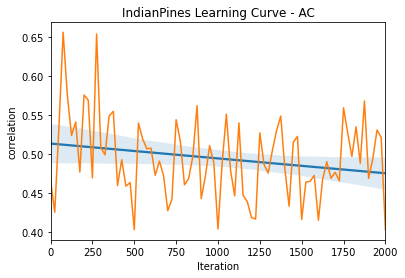

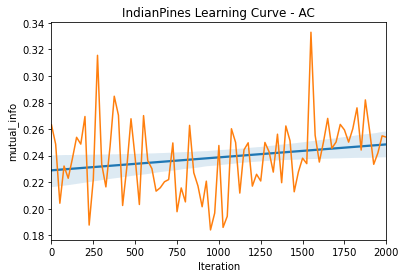

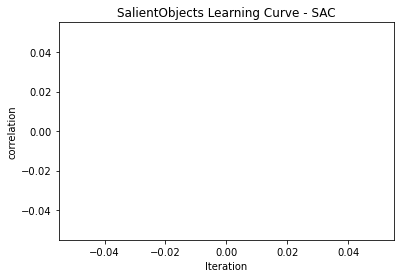

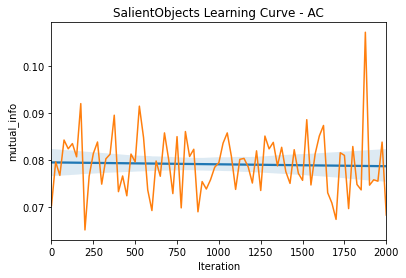

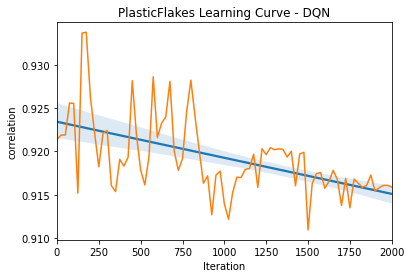

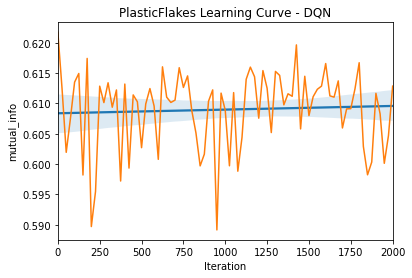

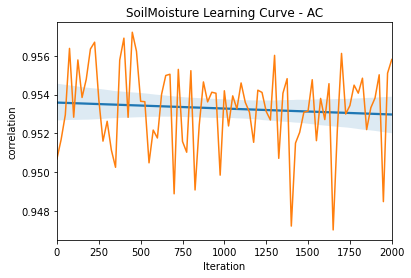

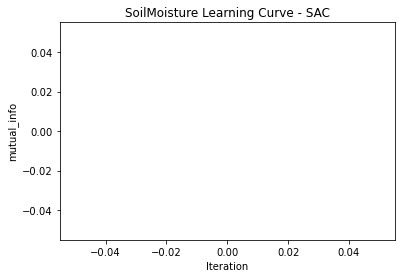

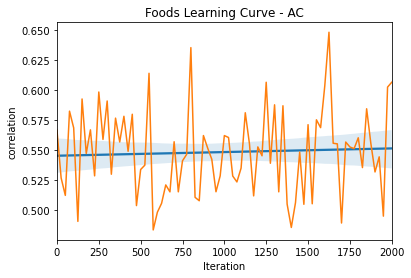

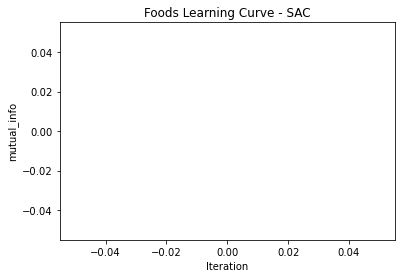

In [46]:

best_run_dict = {
    'IndianPines':{'correlation':'AC' , 'mutual_info':'AC'},
    'SalientObjects':{'correlation':'DDQN' , 'mutual_info':'AC'},
    'PlasticFlakes':{'correlation':'AC' , 'mutual_info':'AC'},
    'SoilMoisture':{'correlation':'DDQN' , 'mutual_info':'DDQN'},
    'Foods':{'correlation':'DDQN' , 'mutual_info':'AC'},
}

best_run_dict = {
    'IndianPines':{'correlation':'AC' , 'mutual_info':'AC'},
    'SalientObjects':{'correlation':'SAC' , 'mutual_info':'AC'},
    'PlasticFlakes':{'correlation':'DQN' , 'mutual_info':'DQN'},
    'SoilMoisture':{'correlation':'AC' , 'mutual_info':'SAC'},
    'Foods':{'correlation':'AC' , 'mutual_info':'SAC'},
}

for dataset in ['IndianPines', 'SalientObjects', 'PlasticFlakes', 'SoilMoisture', 'Foods']:
    for reward in ['correlation', 'mutual_info']:
        best_model = best_run_dict[dataset][reward]
        filter_df = d[(d['agent_class']==best_model) &
                      (d['dataset_type']==dataset) &
                      (d['reward_type']==reward) &
                      (d['Selected Band']==29) &
                      (d['iter_num'] >= 0)]
        
        sns.regplot(x='iter_num', y='Metric Next State', data=filter_df, scatter=False)
        sns.lineplot(x='iter_num', y='Metric Next State', data=filter_df)
        plt.xlabel('Iteration')
        plt.ylabel(reward)
        plt.title(f'{dataset} Learning Curve - {best_model}')
        plt.show()
        
        
        
        

In [5]:
d[(d['Selected Band'] == 29) & (d['dataset_type'] == 'IndianPines') & (d['agent_class'] == 'DQN') & (d['double_q'] == False) & (d['reward_type'] == 'correlation')]

,iter_num,Selected Band,Action Type,Mean,Min,Max,Metric Current State,Metric Next State,Reward,Loss,Unnamed: 0,agent_class,reward_type,band_selection_num,dataset_type,double_q
29,0.0,29.0,Random Action,0.008615,-0.114912,0.615501,0.479878,0.479001,1.000877,0.634715,29.0,DQN,correlation,30.0,IndianPines,False
59,25.0,29.0,Random Action,0.100307,-0.638123,10.686228,0.628783,0.637374,0.991445,0.618173,59.0,DQN,correlation,30.0,IndianPines,False
89,50.0,29.0,Max Action,0.247612,-1.177620,31.138771,0.626048,0.592153,1.034475,1.392951,89.0,DQN,correlation,30.0,IndianPines,False
119,75.0,29.0,Max Action,0.199105,-0.800803,26.111030,0.605245,0.605317,0.999929,2.696079,119.0,DQN,correlation,30.0,IndianPines,False
149,100.0,29.0,Max Action,0.144220,-0.604269,17.366920,0.655696,0.664608,0.991127,5.086612,149.0,DQN,correlation,30.0,IndianPines,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,1900.0,29.0,Max Action,1.261210,-0.700456,94.993730,0.545905,0.527554,1.018520,3.118515,2309.0,DQN,correlation,30.0,IndianPines,False
2339,1925.0,29.0,Max Action,1.260694,-0.700351,94.938780,0.535955,0.517482,1.018645,3.115195,2339.0,DQN,correlation,30.0,IndianPines,False
2369,1950.0,29.0,Max Action,1.260643,-0.700533,94.955185,0.539953,0.521406,1.018720,3.116976,2369.0,DQN,correlation,30.0,IndianPines,False
2399,1975.0,29.0,Max Action,1.260330,-0.700518,94.930140,0.558295,0.538352,1.020143,3.117968,2399.0,DQN,correlation,30.0,IndianPines,False


In [6]:
d[(d['Selected Band'] == 29) & (d['dataset_type'] == 'Foods') & (d['agent_class'] == 'DQN') & (d['double_q'] == False) & (d['reward_type'] == 'correlation')]

,iter_num,Selected Band,Action Type,Mean,Min,Max,Metric Current State,Metric Next State,Reward,Loss,Unnamed: 0,agent_class,reward_type,band_selection_num,dataset_type,double_q
29,0.0,29.0,Random Action,0.141727,-0.444075,1.969245,0.440313,0.447274,0.993064,0.026074,29.0,DQN,correlation,30.0,Foods,False
59,25.0,29.0,Random Action,0.600562,-1.450368,18.654330,0.440914,0.448191,0.992750,3.595654,59.0,DQN,correlation,30.0,Foods,False
89,50.0,29.0,Max Action,0.382748,-0.849307,12.434382,0.447082,0.453821,0.993283,5.057094,89.0,DQN,correlation,30.0,Foods,False
119,75.0,29.0,Max Action,0.379551,-0.746366,11.901601,0.439682,0.439838,0.999844,2.219100,119.0,DQN,correlation,30.0,Foods,False
149,100.0,29.0,Max Action,0.165339,-0.405017,3.999562,0.385483,0.376196,1.009329,0.803141,149.0,DQN,correlation,30.0,Foods,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,1900.0,29.0,Max Action,-0.461846,-7.166860,0.997314,0.622331,0.627808,0.994537,0.008838,2309.0,DQN,correlation,30.0,Foods,False
2339,1925.0,29.0,Max Action,-0.420413,-6.408523,1.341813,0.653063,0.657555,0.995519,0.026794,2339.0,DQN,correlation,30.0,Foods,False
2369,1950.0,29.0,Max Action,-0.443225,-6.508899,1.029503,0.620267,0.625625,0.994657,0.005957,2369.0,DQN,correlation,30.0,Foods,False
2399,1975.0,29.0,Max Action,-0.441963,-6.605118,1.027528,0.640836,0.645551,0.995295,0.005392,2399.0,DQN,correlation,30.0,Foods,False


In [7]:
#path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/foods/hyperspectral_imagery/foods_hyper.npy'
#path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/indian_pines/hyperspectral_imagery/indian_pines_corrected.npy'
#path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/salient_objects/hyperspectral_imagery/salient-object-data.npy'
#path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/plastic_flakes/hyperspectral_imagery/plastic-flake-data.npy'
#path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/soil_moisture/hyperspectral_imagery/soil_moisture_hyper.npy'
#data = np.load(path)
#data.shape

In [8]:
'''
bands = np.load('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/output/Run - 2022-12-13 07:35:27.913283/selected_bands.npy')
bands
'''

"\nbands = np.load('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/output/Run - 2022-12-13 07:35:27.913283/selected_bands.npy')\nbands\n"

In [9]:
'''
def calculate_correlations(state, corr_cache):
        
#         if repr(state) in self.cache:
#             return self.cache[repr(state)]

    #deal with the first state
    ##### THIS LOGIC SEEMS WRONG - REGARDLESS OF THE FIRST PICK, YOU HAVE A REWARD OF 0#####
    if np.sum(state) <= 1:
        return 0


    
    selected_bands = []
    non_zero_bands = np.argwhere(np.array(state) != 0)
    for bandz in non_zero_bands:
#             print(band[0])
        selected_bands.extend([bandz[0]]*int(state[bandz[0]]))
    #print(selected_bands)
    #selected_bands = np.squeeze(np.argwhere(np.array(state)==1))
    corr_sum = 0
    print(selected_bands)
    for idx_i, i in enumerate(selected_bands):
        for idx_j, j in enumerate(selected_bands):
            if idx_i != idx_j:

                #if repr((i,j)) in self.cache:
                #    result = self.cache[repr((i,j))]
                #else:
                result = abs(pearsonr(data[:, i], data[:, j])[0])
                #self.cache[repr((i,j))] = result

                corr_sum += result

#                     corr_sum += abs(pearsonr(self.DataManager.rl_data[:, i], self.DataManager.rl_data[:, j])[0])

#         self.cache[repr(state)] = corr_sum/(len(selected_bands)**2)

#         return self.cache[repr(state)]
    return corr_sum/(len(selected_bands)**2)
'''

'\ndef calculate_correlations(state, corr_cache):\n        \n#         if repr(state) in self.cache:\n#             return self.cache[repr(state)]\n\n    #deal with the first state\n    ##### THIS LOGIC SEEMS WRONG - REGARDLESS OF THE FIRST PICK, YOU HAVE A REWARD OF 0#####\n    if np.sum(state) <= 1:\n        return 0\n\n\n    \n    selected_bands = []\n    non_zero_bands = np.argwhere(np.array(state) != 0)\n    for bandz in non_zero_bands:\n#             print(band[0])\n        selected_bands.extend([bandz[0]]*int(state[bandz[0]]))\n    #print(selected_bands)\n    #selected_bands = np.squeeze(np.argwhere(np.array(state)==1))\n    corr_sum = 0\n    print(selected_bands)\n    for idx_i, i in enumerate(selected_bands):\n        for idx_j, j in enumerate(selected_bands):\n            if idx_i != idx_j:\n\n                #if repr((i,j)) in self.cache:\n                #    result = self.cache[repr((i,j))]\n                #else:\n                result = abs(pearsonr(data[:, i], data[:, 

In [10]:
'''
def mutual_info(state):
        
#         if repr(state) in self.cache:
#             return self.cache[repr(state)]

    #deal with the first state
    ##### THIS LOGIC SEEMS WRONG - REGARDLESS OF THE FIRST PICK, YOU HAVE A REWARD OF 0#####
    if np.sum(state) <= 1:
        return 0


    
    selected_bands = []
    non_zero_bands = np.argwhere(np.array(state) != 0)
    for bandz in non_zero_bands:
#             print(band[0])
        selected_bands.extend([bandz[0]]*int(state[bandz[0]]))
    #print(selected_bands)
    #selected_bands = np.squeeze(np.argwhere(np.array(state)==1))
    corr_sum = 0
    print(selected_bands)
    for idx_i, i in enumerate(selected_bands):
        for idx_j, j in enumerate(selected_bands):
            if idx_i != idx_j:

                #if repr((i,j)) in self.cache:
                #    result = self.cache[repr((i,j))]
                #else:
                result = normalized_mutual_info_score(data[:, i], data[:, j])
                #self.cache[repr((i,j))] = result

                corr_sum += result

#                     corr_sum += abs(pearsonr(self.DataManager.rl_data[:, i], self.DataManager.rl_data[:, j])[0])

#         self.cache[repr(state)] = corr_sum/(len(selected_bands)**2)

#         return self.cache[repr(state)]
    return corr_sum/(len(selected_bands)**2)
'''

'\ndef mutual_info(state):\n        \n#         if repr(state) in self.cache:\n#             return self.cache[repr(state)]\n\n    #deal with the first state\n    ##### THIS LOGIC SEEMS WRONG - REGARDLESS OF THE FIRST PICK, YOU HAVE A REWARD OF 0#####\n    if np.sum(state) <= 1:\n        return 0\n\n\n    \n    selected_bands = []\n    non_zero_bands = np.argwhere(np.array(state) != 0)\n    for bandz in non_zero_bands:\n#             print(band[0])\n        selected_bands.extend([bandz[0]]*int(state[bandz[0]]))\n    #print(selected_bands)\n    #selected_bands = np.squeeze(np.argwhere(np.array(state)==1))\n    corr_sum = 0\n    print(selected_bands)\n    for idx_i, i in enumerate(selected_bands):\n        for idx_j, j in enumerate(selected_bands):\n            if idx_i != idx_j:\n\n                #if repr((i,j)) in self.cache:\n                #    result = self.cache[repr((i,j))]\n                #else:\n                result = normalized_mutual_info_score(data[:, i], data[:, j])\n  

In [11]:
'''
state = np.zeros(data.shape[1])

state[bands] = 1
print(bands)
print(state)

calculate_correlations(state), mutual_info(state)
'''

'\nstate = np.zeros(data.shape[1])\n\nstate[bands] = 1\nprint(bands)\nprint(state)\n\ncalculate_correlations(state), mutual_info(state)\n'

In [12]:
'''
bands_2 =[ 1 , 5,  9, 10, 22, 23, 27, 28, 29, 31, 33, 34, 35, 36, 39, 46, 48, 50, 54, 59, 61, 63, 66, 72,
 74, 80, 82, 89, 90, 93]

state = np.zeros(96)
state[bands_2] = 1
print(bands_2)
print(state)


calculate_correlations(state)
'''

'\nbands_2 =[ 1 , 5,  9, 10, 22, 23, 27, 28, 29, 31, 33, 34, 35, 36, 39, 46, 48, 50, 54, 59, 61, 63, 66, 72,\n 74, 80, 82, 89, 90, 93]\n\nstate = np.zeros(96)\nstate[bands_2] = 1\nprint(bands_2)\nprint(state)\n\n\ncalculate_correlations(state)\n'

In [13]:
#bands

#0.597689331988278

In [14]:
'''
[ 2  5  6  8 16 17 19 23 25 27 30 32 36 39 40 42 44 45 48 49 55 63 70 73
 75 76 88 91 92 93]
 '''

'\n[ 2  5  6  8 16 17 19 23 25 27 30 32 36 39 40 42 44 45 48 49 55 63 70 73\n 75 76 88 91 92 93]\n '

In [15]:
'''
path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/foods/hyperspectral_imagery/foods_hyper.npy'
data = np.load(path)
'''

"\npath = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/foods/hyperspectral_imagery/foods_hyper.npy'\ndata = np.load(path)\n"

In [16]:
'''
def _stack(data_folder):
    data = None

    for _, _, files in os.walk(data_folder):
        for idx, file in enumerate(files):
            print(f'\rLoading {idx} out of {len(files)}', end='')
            file_data = np.load(os.path.join(data_folder, file))

            if isinstance(data, type(None)):
                data = file_data
            else:
                data = np.vstack((data, file_data))

    return data
'''

"\ndef _stack(data_folder):\n    data = None\n\n    for _, _, files in os.walk(data_folder):\n        for idx, file in enumerate(files):\n            print(f'\rLoading {idx} out of {len(files)}', end='')\n            file_data = np.load(os.path.join(data_folder, file))\n\n            if isinstance(data, type(None)):\n                data = file_data\n            else:\n                data = np.vstack((data, file_data))\n\n    return data\n"

In [17]:
'''path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/plastic_flakes/hyperspectral_imagery'
data = _stack(path)'''

"path = '/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/plastic_flakes/hyperspectral_imagery'\ndata = _stack(path)"

In [18]:
'''sample_ratio = 0.1
indices = np.random.choice(np.arange(0, data.shape[0], 1), int(data.shape[0]*sample_ratio), replace=False)
data = data[indices, :]
data.shape[0]'''

'sample_ratio = 0.1\nindices = np.random.choice(np.arange(0, data.shape[0], 1), int(data.shape[0]*sample_ratio), replace=False)\ndata = data[indices, :]\ndata.shape[0]'

In [19]:
'''data.shape'''

'data.shape'

In [20]:
'''np.save('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/plastic_flakes/hyperspectral_imagery/data.npy', data)'''

"np.save('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/HyperSpectralRL_V2/data/plastic_flakes/hyperspectral_imagery/data.npy', data)"